<br>
<br>
<br>
<br>

# DAV 6150 Summer 2020 Module 4: Dimensionality Reduction & Feature Selection
<br>
<br>
<br>

## Module 3 Assignment Review

### Missing Data Values

Of the 12795 rows contained within the data set, only 6436 (50.3%) represent “complete cases” wherein we find no missing data values for any variables. Analysis shows that eight of the fourteen predictor variables have missing data values.

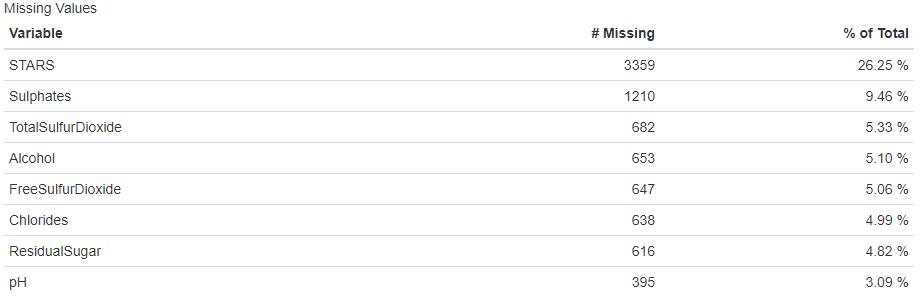


#### Missing STARS Values

- More than 26% of STARS values are missing. Is that necessarily a cause for concern? Based on domain knowledge + common sense, are there any potentially plausible explanations for why so many wines lack a STARS value?



### Variables With Invalid Negative Data Values

Nine variables representing various chemical composition measures within wines (Chlorides, ResidualSugar, FreeSulfurDioxide, CitricAcid, VolatileAcidity, TotalSulfur, DioxideSulphates, FixedAcidity and Alcohol) contain large numbers of negative data values. Further analysis of the negative values reveals that they are pervasive throughout the data set and seem to occur randomly within the 12795 observations.

A cursory survey of the typically reported values for each of these nine attributes reveals that their values __should be strictly positive__ and __zero bound__.  In other words, __none of these variables could plausibly contain a valid negative value within the context of our data set__.

Some potential sources of domain knowledge for this data set (there are many, many others available !!):

- Chlorides: https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095


- Sulfites: https://www.morethanorganic.com/sulphur-in-the-bottle


- PH Value: https://www.winemag.com/2019/06/19/what-is-acidity-in-wine/


- Acid Index: https://www.ajevonline.org/content/31/3/265


- Residual Sugars: https://winemakermag.com/technique/501-measuring-residual-sugar-techniques#:~:text=Residual%20Sugar%20Concentration,-Residual%20sugar%20concentration&text=Dry%20wines%20are%20typically%20in,the%205.0%E2%80%9315%20percent%20range.


- Density: https://chemwine.com/home/why-is-wine-density-important-1-sl6yl/


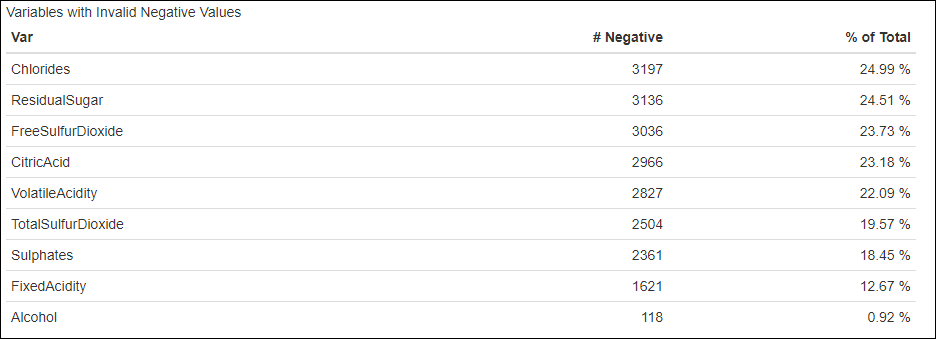

### Histograms of Variables

Histograms show a rather surprising commonality amongst the distributions of the continuous numeric variables: all of them appear to have very balanced, nearly normal distributions punctuated by large spikes at or near their midpoints.

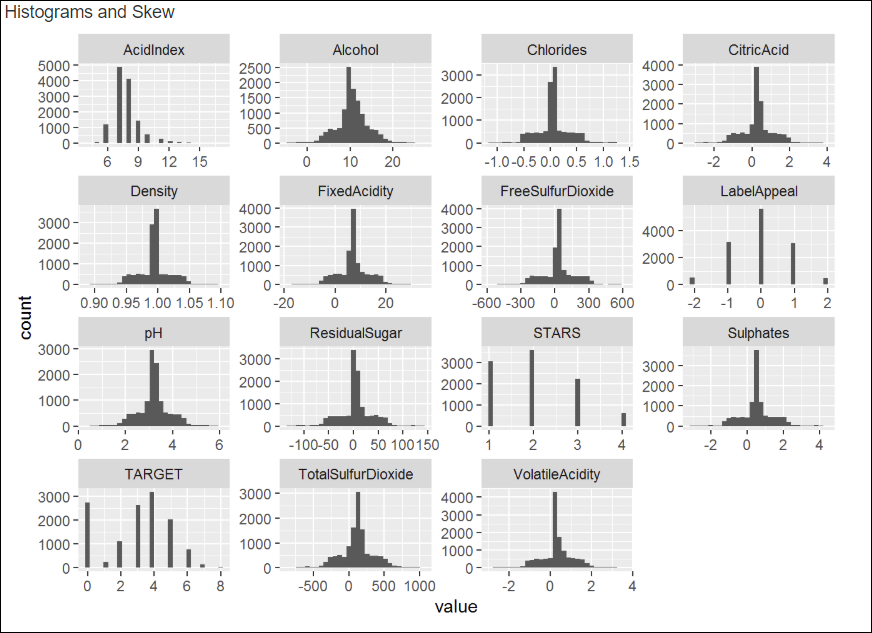

Our previous discovery of the negative data values contained within nine of the variables should lead us to conclude that the shape of the distributions of each of those nine variables __is unlikely to be reflective of valid data__, i.e., __we should not rely upon the output shown in those nine histograms for purposes of feature selection and/or model building__.

### So How Might We Deal With These Issues?

Since we don't have the ability to question the authors of the data set, we must __make reasonable assumptions based on our domain knowledge + expertise as data science practitioners.__

#### Negative Data Values

What to do? Some ideas suggested by students:

- Add a constant (e.g., the absolute value of the minimum value for a given variable) to each negative value to ensure that all values within an atrribute are positive.


- Use the absolute value of each negative data value in place of the negative value.


- Simply delete the attributes containing the negative data values


- Delete any observations containing negative data values


Which approach is best / most appropriate? The answer to that question is highly dependent upon your own assessment of the data and its potential use within whatever type of model you hope to construct. __You need to decide upon + be ready to defend your course of action__. That means being ready to explain why you believe your approach will prove to be more effective and/or efficient than other possible approaches + explaining why specific alternative approaches are likely to be less effective / efficient than the approach you have chosen.


#### Missing Data Values

- For each variable, decide how best to handle the missing data values, e.g., fill with mean or median? Fill via some sort of predictive model?, etc.


- Develop a __reasonable__ approach for each variable and explain your rationale __in writing__. Then, ask yourself if your rationale is likely to survive strict scrutiny from your peers and/or colleagues. If not, rethink your approach.


Some possible approaches suggested by students:

- Use of mean, median or mode values


- Imputation via a K-Nearest Neighbors imputation (e.g., https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)


- Imputation via backfilling and forward filling


- Imputation via an iterative imputer (i.e., each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features. For an example see: https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/ )

When choosing an imputation method, ask yourself what the strengths and limitations of each of these approaches might be __relative to the data you have at hand__. You need to consider both the __computational complexity__ and the __likely reliability / performance__ of each potential approach when making a decision. For example, for a very small number of missing values it might be appropriate to rely on the use of a median value since imputing the same value for a small number of instances is relatively unlikely to introduce bias within your data (i.e., __alter the probability density function derived from the variable's known data__). 

For situations in which we have more than just a small number of missing values, use of a more complex imputation approach is generally warranted to increase the likelihood that we will maintain the shape of the probability density function we derived from the variable's known data.


# Module 4


## Machine Learning Models: "Simpler" is Better

- Machine learning models that are overly complex can be difficult, if not impossible, to interpret / explain


- Complex models can also be very computationally expensive


- A great deal of model complexity can be eliminated by simply reducing the number of explanatory variables employed within a model.


- Models can be simplified through the use of __Dimensionality Reduction__ and __Feature Selection__ techniques.


## Dimensionality Reduction

__What is "Dimensionality"?__: Within the context of data science and machine learning, "dimensionality" refers to the number of potential explanatory variables (a.k.a., "features") contained within a set of data we plan to make use of for the construction of a model.


__What is "The Curse of Dimensionality"?__: If the number of features available to us within a data set is very large relative to the number of observations, some machine learning algorithms will fail to produce effective models, particularly those which are based on similarity metrics (e.g., K-nearest neighbors, clustering, etc.). 


__Dimensionality Reduction__: We can reduce the number of __numeric__ features to be used within a model via the application of linear algebra techniques (e.g., Principal Components Analysis (PCA); Singular Value Decomposition (SVD)). These methods allow us to derive orthogonal features from a non-orthogonal collection of __numeric__ features. We can then use these new orthogonal features as explanatory variables within our machine learning models. 


### Principal Components Analysis (PCA)

- PCA uses an orthogonal transformation to convert a set of possibly correlated __numeric__ features into a set of values of linearly uncorrelated (a.k.a., __orthogonal__) features known as __principal components__. These new features are then used in a machine learning model __in place of the original features that were used to generate the principal components__.  The principal components themselves are assessed by ranking them in order of the amount of variance in the data they explain. When used within a machine learning context, we generally opt to select the most relevant principal components (i.e., those that explain the greatest amount of variance). For example, we might decide we want to retain the principal components that cumulatively explain at least x% of the variability in the data. (__NOTE__: it is __NOT__ appropriate to use PCA on categorical features, even when they have been converted to binary "one-hot" dummy variables. If you want to reduce the dimensionality of categorical data you should instead rely on the use of __feature selection__ techniques).


- Unfortunately, there is no strict rule of thumb to apply when deciding how many principal components to retain for use within a machine learning model. 


- __A major benefit of PCA__: PCA can often drastically the dimensionality of our data, thereby greatly reducing the number of explanatory variables needed to be included within a machine learning model.


- __A major drawback to PCA__: Principal components are extremely difficult to interpret / explain.  As such, any model constructed with principal components will also be __very__ difficult to interpret / explain. 


- __Another major drawback to PCA__: PCA should not be applied to categorical features, even if they have been converted to binary "one-hot" dummy variables.


- A good, simple example from your assigned readings: https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


- Within Python we can make use of the __sklearn.decomposition.PCA()__ function to identify the principal components of a data set: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


Now let's look at a simple example of how to use the output of PCA as input to a machine learning algorithm (adapted from https://stackoverflow.com/questions/32194967/how-to-do-pca-and-svm-for-classification-in-python): 

In [14]:
# load numpy + 'datasets'. We'll use the "iris" data that is provided with sklearn
import numpy as np
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# load PCA + SVM classifier ("SVC") + cross validation functions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

# load the iris dataset
iris = datasets.load_iris()

# what is the dimensionality of the data?
iris.data.shape

(150, 4)

As we can see above, we have 150 observations comprised of 4 features. What do the features look like?

In [15]:
# display the first row of the array
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

As shown above, each of the features contains floating point numbers. Since all of the features are numeric we can apply PCA to the data set in an attempt to reduce its dimensionality.

In [16]:
# assign the explanatory variables to a Python object
X = iris.data

# assign the response variable to a Python object
y = iris.target

# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.9348581  0.04635375]


The application of PCA to the data set has yielded two principal components, the first of which explains 93.485% of the variance in the iris data. The second principal component explains an additional 4.635% of the variance in the data. Therefore, the two principal components explain a total of more than 98% of the variance in the data set.

In [17]:
# display the singular values associated with the 2 principal components
print(pca.singular_values_)

[20.62747613  4.59320324]


In [19]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)

# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)

# create an instance of an SVM classifier
clf = SVC()

# fit the SVM classifier to the transformed training data + the response data
clf.fit(X_t_train, y_train)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print ('score', clf.score(X_t_test, y_test) )

score 0.9333333333333333


Our SVM classifier has achieved an accuracy score of 93.3% when applied to the two principal components we derived from the iris data. 

In [20]:
# if desired, generate predictions from the SVM classifier for the transformed testing data
print ('pred label', clf.predict(X_t_test) )

pred label [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 1 2 1 2]


## Feature Selection

We can determine which attributes/features to include within a model via the application of a variety of thresholding "filters" (e.g., exclude all variables whose variance falls below a certain value; if two or more variables are highly correlated with one another, choose one to use within the model and exclude the others; etc.)

Some of the most commonly used feature selection techniques include:

__Variance Threshholds__: Start by normalizing the features you plan to use as explanatory variables, then calculate their variances. Features whose values show relatively little variance are much less likely to be introducing valuable information within the context of a model, so they are strong candidates for exclusion from your model. How you choose the threshold value is highly subjective / empirical.


__Correlation Thresholds__: Remove features that are highly correlated with other features. As with variance thresholds, the choice of a correlation value to use as a threshold is highly subjectve / empirical.


__Forward Selection__: Used in regression modeling. Incrementally add features to a model one at a time until model performance no longer improves. A common approach to Forward Stepwise Search is to begin your modeling using the explanatory variable that is most highly correlated with the response variable, then sequentially add additional explanatory variables in decreasing order of their correlation with the response variable. The general algorithm is as follows:

- Start with the null model, a model containing an intercept but no predictors.
- Fit a simple linear regression model to each individual explanatory variable and then add to the null model that variable resulting in the lowest residual sum of squares value ("RSS").
- Add to that model the variable that results in the lowest RSS amongst all two-variable models.
- The algorithm continues until some stopping rule is satisfied (i.e. all remaining variables have a p-value greater than some
threshold).

An example of one way to implement forward selection in Python can be found here: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f


__Backward Selection__: Used in regression modeling. Start your modeling process using all of the explanatory variables you believe to be appropriate, then sequentially remove variables one at a time until model performance starts to substantively degrade. The general algorithm is as follows:

- Begin with all variables in the model.
- Remove the variable with the largest p-value (i.e. least statistically significant).
- The new model is fit, and the variable with the largest p-value is removed.
- The algorithm continues until a stopping rule is reached (e.g., the p-values of all variables are <= 0.05)

An example of one way to implement backward selection in Python can be found here: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f


__Variance Inflation Factors (VIF)__: A regression-specific metric that can use to help us select features for inclusion within a regression algorithm. A VIF value provides an indication of the presence of multicolinearity amongst the explanatory variables used for regression modeling. VIF is calculated by regressing an explanatory variable against every other available explanatory variable. In general, if your VIF calculations for a feature result in a VIF > 5, that feature is a strong candidate for removal from the model: rerun the model without the variable and check to see whether the model's performance has improved. If so, exclude the feature from the model. If not, leave the feature in the model. An excellent overview of VIF is provided in your assigned reading materials: https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/



# Module 4 Assignment Guidelines / Requirements


# Final Project Guidelines / Requirements